In [2]:
import pandas as pd
import plotly.express as px
import os
import datetime
from dateutil.relativedelta import relativedelta
import calendar

import plotly.io as pio
#pip install -U kaleido

#https://www.geeksforgeeks.org/python-plotly-exporting-to-static-images/

In [3]:
is_py=False

In [10]:
# 31Dec21 - 22May22  (last day of prev month - current date)
# Export data from amibroker as format  D:\AB_DB\AB-Template & Explore\TopN_ROC_XPeriod.apx  
# Ticker,Date/Time,open,high,low,close,name,volume
# AVAX,31/12/2021 00:00:00,101.75,111.99,100.13,109.43,,2472910.50
# AVAX,1/1/2022 00:00:00,109.43,114.50,108.42,114.13,,1211128.00

#Amibroker script 
# Filter=1; 
# AddColumn(O,"open"); 
# AddColumn(H,"high"); 
# AddColumn(L,"low"); 
# AddColumn(C,"close"); 
# AddTextColumn(FullName(),"name");
# AddColumn(V,"volume"); 



In [11]:
# root_path=r'D:\JupyterCode\MyQuantFinProject\Data\ThaiFund\TH_All'
root_path=r'D:\PythonDev\MyQuantFinProject\Data'
result_path='D:\PythonDev\MyQuantFinProject\Data\Report'

# Export Data sicne last day of preve month (Most Impotant)

In [12]:

file_name='5Crypto.csv'
title=file_name.replace('.csv','')
print(file_name," : ",title)

# since the end calculate since x utin to_month_str
to_month_str='2022-10'

month_or_week=1
if month_or_week==1:
 timeframe='M'
 past_month=4
elif month_or_week==2:
 timeframe='W'
 past_week=6

# Whick time frame   and look past in the past x month




required_fullname=False

today=datetime.datetime.today()
print(today)




5Crypto.csv  :  5Crypto
2022-10-23 22:38:14.223506


#Enter data

In [7]:
print(to_month_str)
split_end_to=to_month_str.split('-')
print(split_end_to)
if  len(split_end_to)==2:
 range_month=calendar.monthrange(int(split_end_to[0]), int(split_end_to[1]))
 print(range_month)
else:
 raise Exception("Need format  '2021-12' ")   
    



2022-10
['2022', '10']
(5, 31)


In [8]:
to_month_firstDate=datetime.datetime( int(split_end_to[0]), int(split_end_to[1]) ,1 )
to_month_lastDate=datetime.datetime( int(split_end_to[0]), int(split_end_to[1]) ,range_month[1] )

print(to_month_firstDate)
print(to_month_lastDate)

2022-10-01 00:00:00
2022-10-31 00:00:00


In [9]:
if timeframe=='M':
    from_month=to_month_firstDate  + relativedelta(months=-past_month)
    from_month_str=from_month.strftime('%Y-%m')
    
    to_month_str=to_month_firstDate.strftime('%Y-%m')
    print(f"look back in the  { past_month }+1(Including current month)  {timeframe } : {from_month_str} - {to_month_str}")  
    
elif timeframe=='W':
    if today<to_month_lastDate:
      from_month=today  + relativedelta(weeks=-(past_week+1))
      to_month_str=today.strftime('%Y-%m-%d')
    
    else: 
      from_month=to_month_lastDate  + relativedelta(weeks=-past_week)  
      to_month_str=to_month_lastDate.strftime('%Y-%m-%d')
    
    from_month_str=from_month.strftime('%Y-%m-%d')
    print(f"look back in the  { past_week }+1(Including current month)  {timeframe } : {from_month_str} - {to_month_str}")   

   

look back in the  4+1(Including current month)  M : 2022-06 - 2022-10


In [72]:
# create directory
folder_report=f'{title}_{timeframe }_{from_month_str}_{to_month_str}'
report_path=result_path+"\\"+folder_report

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path) 
     print(report_path)   
     
except OSError as error:  
    raise error

D:\PythonDev\MyQuantFinProject\Report\MarketWorld_Ex_Crypto_M_2022-06_2022-10


In [73]:
dfAll=pd.read_csv(f'{root_path}\\{file_name}',index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
# dfAll=pd.read_csv(f'{root_path}\\{file_name}',index_col='Date/Time')
dfAll.index.rename('datetime',inplace=True)
print(dfAll.info())

print(dfAll.head())
print(dfAll.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 545 entries, 2022-05-31 to 2022-10-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  545 non-null    object 
 1   open    545 non-null    float64
 2   high    545 non-null    float64
 3   low     545 non-null    float64
 4   close   545 non-null    float64
 5   volume  545 non-null    float64
dtypes: float64(5), object(1)
memory usage: 29.8+ KB
None
           Ticker   open   high    low  close     volume
datetime                                                
2022-05-31   AAXJ  72.37  72.43  71.67  71.69  1159600.0
2022-06-01   AAXJ  72.05  72.17  70.86  71.11   855900.0
2022-06-02   AAXJ  71.33  72.49  71.29  72.49  2624200.0
2022-06-03   AAXJ  71.58  71.72  71.03  71.14  1073000.0
2022-06-06   AAXJ  72.49  72.71  71.66  71.86   913900.0
           Ticker    open    high     low   close       volume
datetime                                                     

In [74]:


df=dfAll.loc[from_month_str:to_month_str,:]

df.rename(columns={'Ticker':'symbol'},inplace=True)


if required_fullname==True: 
 df=df[['symbol','name','close']]   
 df['symbol'] = df.apply( lambda x: f'{x["symbol"]} {x["name"]}'  , axis=1) 
else:
 df=df[['symbol','close']]   
    

print(df.info())

if  df.empty:
    print("No data according to your timeframe.")
    print("The belows is last record.")
    print( dfAll.iloc[len(dfAll)-1,:])
    exit()
    
else:   
    dfAll=None
    
print(df.head())
print(df.tail())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 538 entries, 2022-06-01 to 2022-10-07
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  538 non-null    object 
 1   close   538 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.6+ KB
None
           symbol  close
datetime                
2022-06-01   AAXJ  71.11
2022-06-02   AAXJ  72.49
2022-06-03   AAXJ  71.14
2022-06-06   AAXJ  71.86
2022-06-07   AAXJ  72.21
           symbol   close
datetime                 
2022-10-03    SPY  366.61
2022-10-04    SPY  377.97
2022-10-05    SPY  377.09
2022-10-06    SPY  373.20
2022-10-07    SPY  362.79


In [75]:
last_record=df.index[len(df)-1]
last_record_str=last_record.strftime('%d-%m-%Y')
print("Last Day : ",last_record_str)


list_symbol=df['symbol'].unique().tolist()
print(list_symbol)

# list_symbol=['AVAX','ETH','SOL']

df_Monthly_Price=pd.DataFrame(columns=['symbol','month-year','pct_change'])

Last Day :  07-10-2022
['AAXJ', 'ACWI', 'BMSCITH.BK', 'ASEA', 'QQQ', 'SPY']


In [76]:
for symbol in list_symbol:
    
    dfx_symbol=df.query('symbol==@symbol')
    
    dfx_month = dfx_symbol.resample(timeframe).last()
    dfx_month=dfx_month .reset_index()
    
    dfx_month['pct_change']=dfx_month['close'].pct_change()*100
    dfx_month['pct_change']=dfx_month['pct_change'].round(1)

    if timeframe=='M':
     dfx_month['month-year']=dfx_month['datetime'].apply( lambda x: x.strftime('%m-%Y') )
    elif timeframe=='W':
     dfx_month['month-year']=dfx_month['datetime'].apply( lambda x: x.strftime('%d-%m-%Y') )  
     dfx_month.loc[len(dfx_month)-1,'month-year']=last_record_str
        

    dfx_month=dfx_month[['symbol','month-year','close','pct_change']]
    
    dfx_month=dfx_month.dropna()
    dfx_month=dfx_month.drop(columns=['close'])
    
    
    df_Monthly_Price=pd.concat([df_Monthly_Price, dfx_month], ignore_index=True)
    
    print(dfx_month)
    


  symbol month-year  pct_change
1   AAXJ    07-2022        -1.7
2   AAXJ    08-2022        -1.5
3   AAXJ    09-2022       -12.6
4   AAXJ    10-2022         1.5
  symbol month-year  pct_change
1   ACWI    07-2022         7.1
2   ACWI    08-2022        -4.4
3   ACWI    09-2022        -9.4
4   ACWI    10-2022         1.5
       symbol month-year  pct_change
1  BMSCITH.BK    07-2022         1.6
2  BMSCITH.BK    08-2022         2.0
3  BMSCITH.BK    09-2022        -2.8
4  BMSCITH.BK    10-2022        -1.0
  symbol month-year  pct_change
1   ASEA    07-2022         2.6
2   ASEA    08-2022         2.2
3   ASEA    09-2022        -4.9
4   ASEA    10-2022        -0.4
  symbol month-year  pct_change
1    QQQ    07-2022        12.6
2    QQQ    08-2022        -5.1
3    QQQ    09-2022       -10.7
4    QQQ    10-2022         0.7
  symbol month-year  pct_change
1    SPY    07-2022         9.2
2    SPY    08-2022        -4.1
3    SPY    09-2022        -9.6
4    SPY    10-2022         1.6


In [77]:
if timeframe=='W':
 df_Monthly_Price['month-year'] = pd.to_datetime(df_Monthly_Price['df_Monthly_Price'], format='%d-%m-%Y')

df_Monthly_Price=df_Monthly_Price.sort_values(by=["month-year"],ascending = [False])
df_Monthly_Price=df_Monthly_Price.reset_index(drop=True)
df_Monthly_Price.head(30)

,symbol,month-year,pct_change
0,QQQ,07-2022,12.6
1,SPY,07-2022,9.2
2,ACWI,07-2022,7.1
3,ASEA,07-2022,2.6
4,BMSCITH.BK,07-2022,1.6
5,AAXJ,07-2022,-1.7
6,ASEA,08-2022,2.2
7,BMSCITH.BK,08-2022,2.0
8,AAXJ,08-2022,-1.5
9,SPY,08-2022,-4.1


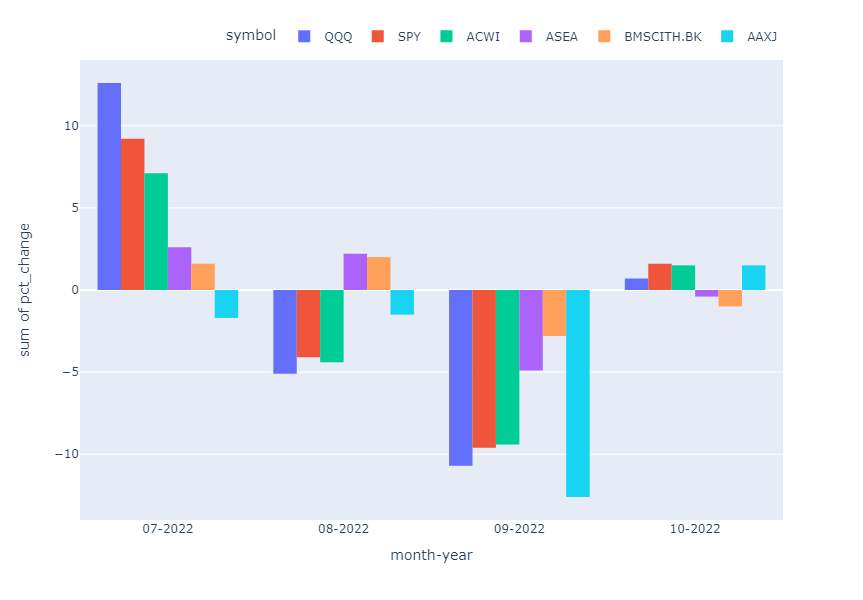

In [79]:
chart_title='pct_change'
fig = px.histogram(df_Monthly_Price, x="month-year", y="pct_change",
             color='symbol', barmode='group',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

# fig.update_layout(
#     autosize=True,
#     width=2000,
#     height=1000,)

fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")


In [57]:
df_AllMonthly_Price=  df_Monthly_Price.groupby(["symbol"])[["pct_change"]].sum()
df_AllMonthly_Price.reset_index(drop=False,inplace=True)
df_AllMonthly_Price=df_AllMonthly_Price.sort_values(by="pct_change",ascending=False)
df_AllMonthly_Price.head()

,symbol,pct_change
3,BITW,29.8
2,ASEA,-0.5
4,QQQ,-2.5
5,SPY,-2.9
1,ACWI,-5.2


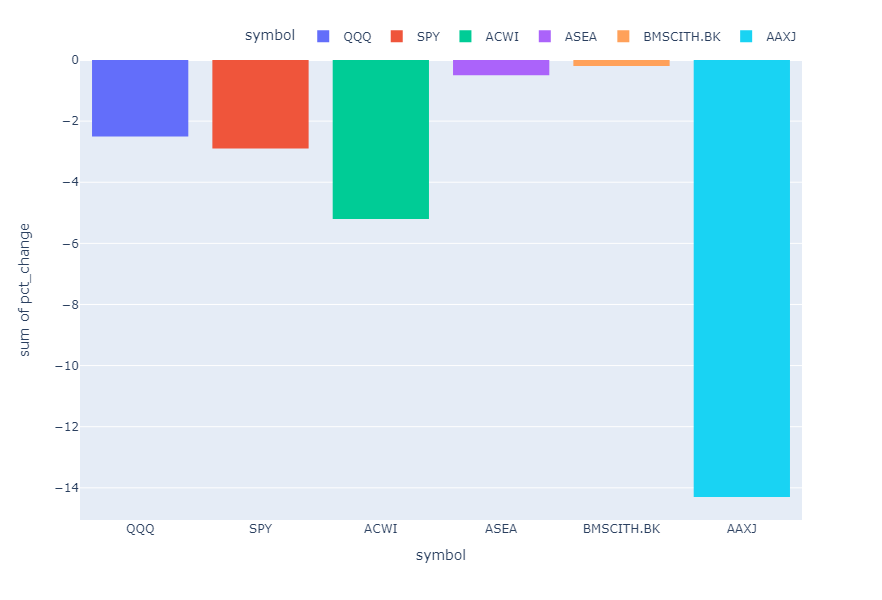

In [80]:
chart_title=f'pct_{from_month_str} - {to_month_str}'
fig = px.histogram(df_AllMonthly_Price, x="symbol", y="pct_change",
             color='symbol',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")

In [81]:
df_Monthly_Price['is-gain']=df_Monthly_Price.apply(lambda x: 1 if x['pct_change']>0 else 0 ,axis=1)
df_Monthly_Price.head()

,symbol,month-year,pct_change,is-gain
0,QQQ,07-2022,12.6,1
1,SPY,07-2022,9.2,1
2,ACWI,07-2022,7.1,1
3,ASEA,07-2022,2.6,1
4,BMSCITH.BK,07-2022,1.6,1


In [82]:
df_Monthly_Count=df_Monthly_Price.groupby(['month-year','is-gain'],as_index=False).size()
df_Monthly_Count.rename(columns={'size':'count'},inplace=True)
df_Monthly_Count.tail()

,month-year,is-gain,count
2,08-2022,0,4
3,08-2022,1,2
4,09-2022,0,6
5,10-2022,0,2
6,10-2022,1,4


In [83]:
if timeframe=='M':
 df_Monthly_Count['month-year'] = pd.to_datetime(df_Monthly_Count['month-year'], format='%m-%Y')
elif timeframe=='W':
 df_Monthly_Count['month-year'] = pd.to_datetime(df_Monthly_Count['month-year'], format='%d-%m-%Y')   


if timeframe=='M':
 df_Monthly_Count['month-year']=df_Monthly_Count['month-year'].apply( lambda x: x.strftime('%m-%Y') )
elif timeframe=='W':
 df_Monthly_Count['month-year']=df_Monthly_Count['month-year'].apply( lambda x: x.strftime('%d-%m-%Y') )  

df_Monthly_Count=df_Monthly_Count.sort_values(['month-year'])

df_Monthly_Count

,month-year,is-gain,count
0,07-2022,0,1
1,07-2022,1,5
2,08-2022,0,4
3,08-2022,1,2
4,09-2022,0,6
5,10-2022,0,2
6,10-2022,1,4


In [84]:
df_Monthly_Count=df_Monthly_Count.reset_index(drop=True)
df_Monthly_Count.reset_index()
df_Monthly_Count

,month-year,is-gain,count
0,07-2022,0,1
1,07-2022,1,5
2,08-2022,0,4
3,08-2022,1,2
4,09-2022,0,6
5,10-2022,0,2
6,10-2022,1,4


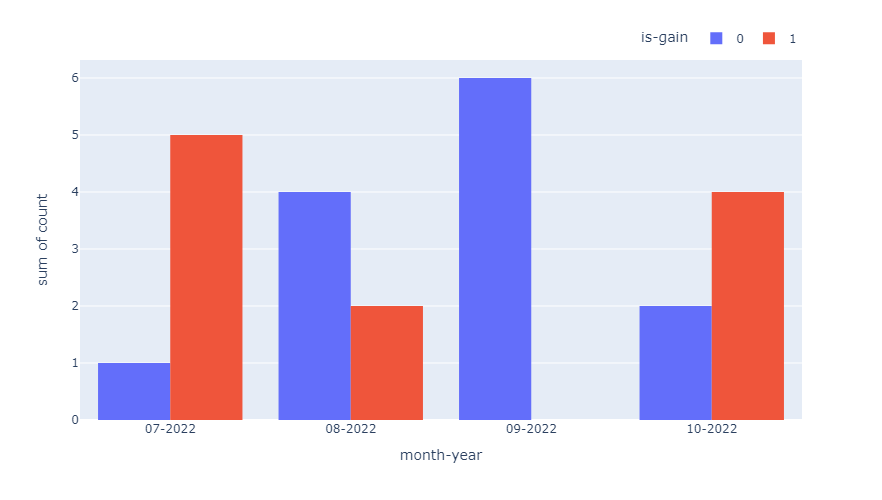

In [85]:
chart_title="gain-lose"

fig = px.histogram(df_Monthly_Count, x="month-year", y="count",
             color='is-gain', barmode='group',height=500)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")

In [86]:
df_AllMonthly_Price['is-gain']=df_AllMonthly_Price.apply(lambda x: 1 if x['pct_change']>0 else 0 ,axis=1)
df_AllMonthly_Price

,symbol,pct_change,is-gain
3,BITW,29.8,1
2,ASEA,-0.5,0
4,QQQ,-2.5,0
5,SPY,-2.9,0
1,ACWI,-5.2,0
0,AAXJ,-14.3,0


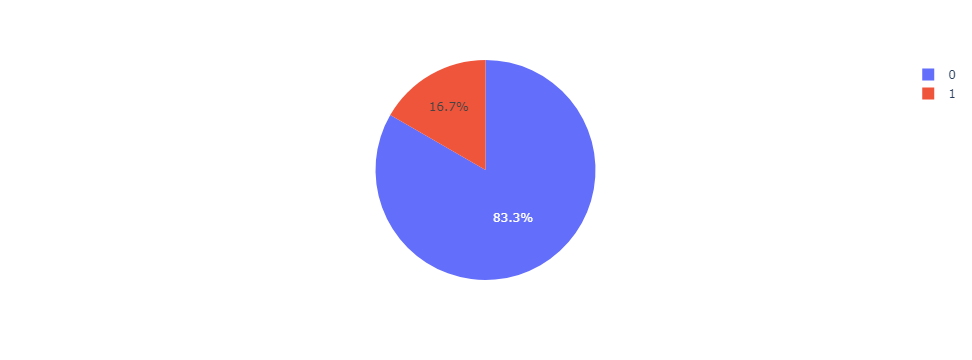

In [87]:
fig = px.pie(df_AllMonthly_Price,"is-gain")
fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}_pie.png")